In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
cd ..

C:\Users\penthotal\Desktop\git_repositories


In [42]:
import numpy as np

import pymc3 as pm

from modules.neural_networks import BayesianMLP

from sktime.datasets.base import load_airline

import matplotlib.pyplot as plt

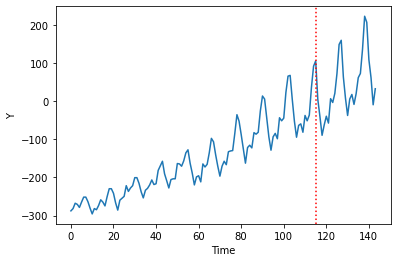

In [43]:
X = load_airline().values
X = (X - X.mean()) - X.std()
T = np.arange(X.shape[0])
window = 10

plt.plot(
    T,
    X
)
plt.axvline(
    int(X.shape[0] * 0.8),
    linestyle=':',
    c='r'
)
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

# One-Step-Ahead Forecast

In [80]:
input_x = []
input_y = []
T = T[window:]

for i in range(len(X) - window):
    
    input_x.append(X[i: i+window])
    input_y.append(X[i+window])
    
input_x = np.array(input_x).reshape((-1, 10))
input_y = np.array(input_y)

idx_tr = int(input_x.shape[0] * 0.8)

X_tr, y_tr = input_x[:idx_tr, :], input_y[:idx_tr]
X_ts, y_ts = input_x[idx_tr:, :], input_y[idx_tr:]

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


Finished [100%]: Average Loss = 744.16


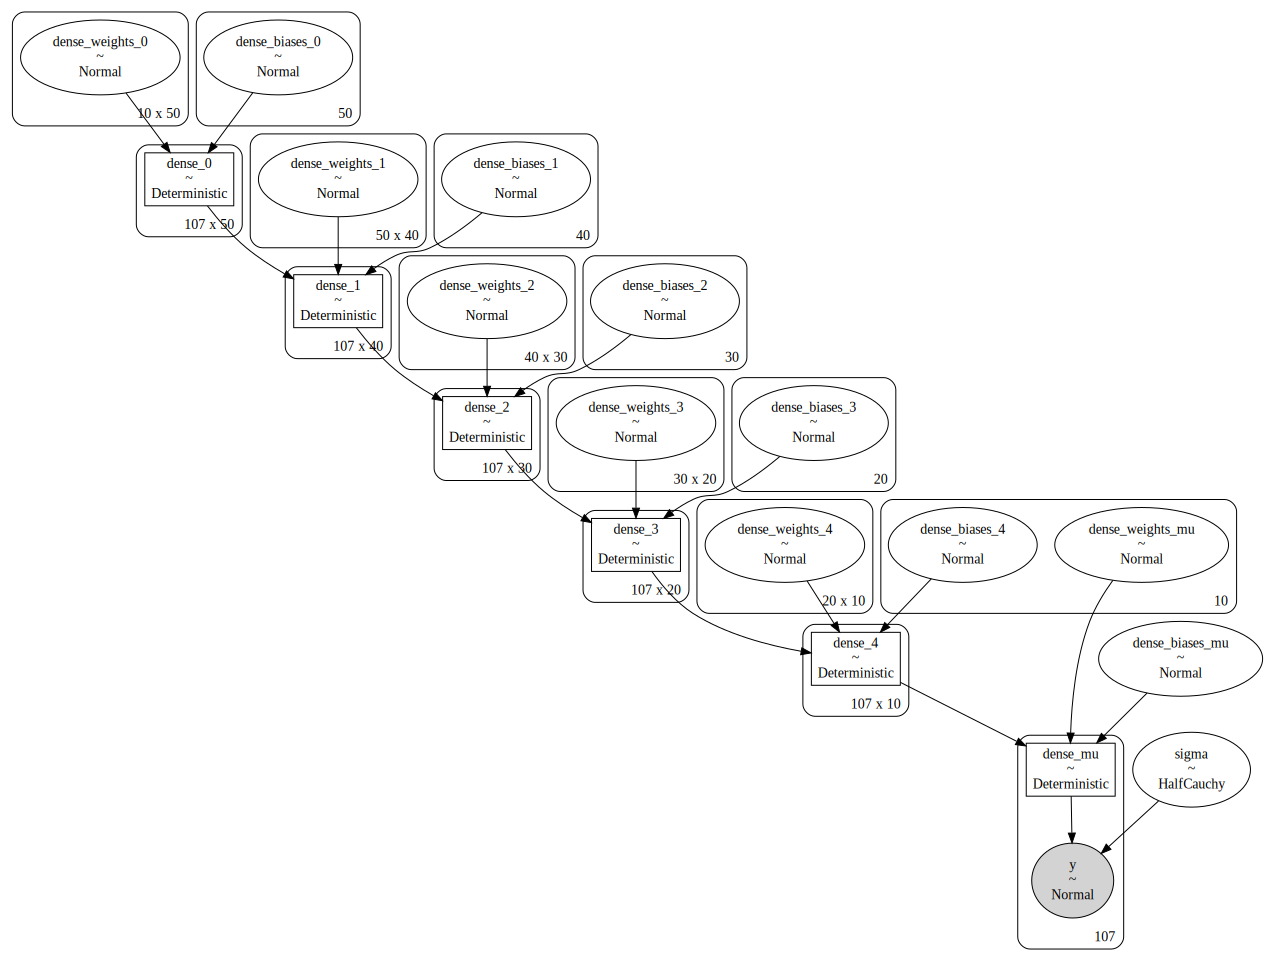

In [81]:
mlp = BayesianMLP(
    X=X_tr, 
    y=y_tr, 
    shape_out=1, 
    likelyhood_model='gaussian_lk',
    layers=(50, 40, 30, 20, 10), 
    activation='tanh',
    prior=pm.Normal,
    advi_approx=True,
    mu=0,
    sigma=1,
    batch_size=X_tr.shape[0]
)
mlp.fit(n=100000)
mlp.show_graph()

In [82]:
insample = mlp.predict(
    X_tr, 
    y_tr,
)
outsample = mlp.predict(
    X_ts, 
    y_ts,
)

ValueError: x and y must have same first dimension, but have shapes (17,) and (27,)

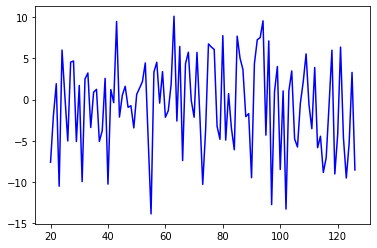

In [83]:
plt.plot(
    T[:len(y_tr)],
    insample['y'].mean(0),
    c='b'
)
plt.plot(
    T[len(y_tr):],
    outsample['y'].mean(0),
    c='b',
    linestyle=':'
)
plt.plot(
    T[:len(y_tr)],
    y_tr,
    c='orange'
)
plt.plot(
    T[len(y_tr):],
    y_ts,
    c='orange',
    linestyle=':'
)
plt.axvline(
    len(y_tr) + window,
    linestyle='--',
    c='r'
)
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

# Multi-Step-Ahead Forecast

In [87]:
input_x = []
input_y = []

for i in range(len(X) - (window*2)):
    
    input_x.append(X[i: i+window])
    input_y.append(X[i+window : i+(window * 2)])
    
input_x = np.array(input_x).reshape((-1, 10))
input_y = np.array(input_y)

idx_tr = int(input_x.shape[0] * 0.8)

X_tr, y_tr = input_x[:idx_tr, :], input_y[:idx_tr]
X_ts, y_ts = input_x[idx_tr:, :], input_y[idx_tr:]

In [ ]:
mlp = BayesianMLP(
    X=X_tr, 
    y=y_tr, 
    shape_out=window, 
    likelyhood_model='gaussian_lk',
    layers=(50, 40, 30, 20, 10), 
    activation='tanh',
    prior=pm.Normal,
    advi_approx=True,
    mu=0,
    sigma=1,
    batch_size=X_tr.shape[0]
)
mlp.fit(n=100000)
mlp.show_graph()

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])
